In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

session = tf.InteractiveSession()

In [2]:
# Declare the module
gan = hub.Module("https://tfhub.dev/google/compare_gan/model_11_cifar10_resnet_cifar/1")

In [ ]:
# Use the generator signature
z_values = tf.random_uniform(minval=-1, maxval=1, shape=[64, 128])
images = gan(z_values, signature="generator")

# Use the discriminator signature
logits = gan(images, signature="discriminator")

In [6]:
session.run(tf.global_variables_initializer())

In [57]:
# Drive execution with tf.Session
images_t, logits_t = session.run([images, logits])

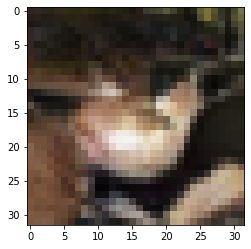

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(images_t[0, ...])

In [67]:
from acgan.benchmark.metrics import InceptionScore
inception = InceptionScore()
x_norm = tf.image.resize(images, (299, 299))
x_norm = 2.0*x_norm - 1.0
output = inception.run(x_norm, max_eval=5000)

5056it [00:32, 155.80it/s]                          


In [69]:
output

(7.244075, 0.18700723)

In [72]:
#gan.variables